## Part I: Research Question

1. Using KNearest Neighbors we will review predictors to attempt classification if a customer will churn or not. 
2. The goal will be to clean, explore, and analyze the data using only statistically significant variables and to demonstrate success or failure with Classification reports ROC curve and AUC. 


## Part II: Method Justification

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression)

The primary assumption that a KNN model makes is that data points/instances which exist in close proximity to each other are highly similar, while if a data point is far away from another group it's dissimilar to those data points. A KNN model calculates similarity using the distance between two points on a graph.


#### LOAD LIBRARIES
##### system
import sys, os

##### Data
import pandas as pd
import numpy as np
import seaborn as sns


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

###### analysis
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn import svm

##### VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#### LIBRARIES
Common libraries used for working with data, stats, visualization and analysis. 
Before beginning Summary statistics all libraries are loaded for easy of management. This may not account for all libraries used for further exploration or experiments.

In [3]:
#### LOAD LIBRARIES
##### system
import sys, os

##### Data
import pandas as pd
import numpy as np
import seaborn as sns


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

###### analysis
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn import svm

##### VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## Part III: Data Preparation
I will attempt to reduce the size reduction of the inputs in order to remove noise.Review outliers to normalize data where appropriate. Finally I will use feature extraction to choose the correct features.

2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.

- Churn - Categorical
- MonthlyCharge - Continuous
- StreamingTV - Categorical
- StreamingMovies - Categorical
- PaperlessBill - Categorical
- Techie - Categorical
- Children - Categorical
- Income - Continuous

3.  Explain each of the steps used to prepare the data for the analysis. 
Identify the code segment for each step.
 - a) Remove fields that provide no business value
 - b) Remove blanks & Drop duplicates 
 - c) Convert float types to integer
 - d) recode yes no fields to binary 1 and 0
 - e) split data into 2 subsets based on num or obj
 - f) detect and remove outliers


4.  Provide a copy of the cleaned data set.

In [8]:
# LOAD DATA
file = pd.read_csv('C://Users//matth//Desktop//DATA//churn_clean.csv')
file.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


 #### a) Remove fields that provide no business value

In [9]:
# Remove fields that are unneeded or appear to have no business value
# Drop unneeded fields
file = file.drop(['UID','TimeZone','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City'], axis = 1)

 #### b) Remove blank spaces drop duplicates

In [10]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


In [11]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

# Drop Duplicates
file = file.drop_duplicates()

#### c) Ensure numeric data is in the correct format

In [12]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

In [13]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

In [14]:
file_null = file.isnull().any()
print(file_null)

Population                      False
Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract                        False
Port_modem                      False
Tablet                          False
InternetService                  True
Phone                           False
Multiple                        False
OnlineSecurity                  False
OnlineBackup                    False
DeviceProtection                False
TechSupport                     False
StreamingTV                     False
StreamingMovies                 False
PaperlessBilling                False
PaymentMethod                   False
Tenure      

#### d)recode yes no fields to binary 1 and 0

In [15]:
#Recode Yes No  to Binary 1 0
file['churn_dum'] = [1 if v == 'Yes' else 0 for v in file['Churn']]
file['Techie'] = [1 if v == 'Yes' else 0 for v in file['Techie']]
file['Tablet'] = [1 if v == 'Yes' else 0 for v in file['Tablet']]
file['Multiple'] = [1 if v == 'Yes' else 0 for v in file['Multiple']]
file['DeviceProtection'] = [1 if v == 'Yes' else 0 for v in file['DeviceProtection']]
file['TechSupport'] = [1 if v == 'Yes' else 0 for v in file['TechSupport']]
file['OnlineSecurity'] = [1 if v == 'Yes' else 0 for v in file['OnlineSecurity']]
file['OnlineBackup'] = [1 if v == 'Yes' else 0 for v in file['OnlineBackup']]
file['DeviceProtection'] = [1 if v == 'Yes' else 0 for v in file['DeviceProtection']]
file['TechSupport'] = [1 if v == 'Yes' else 0 for v in file['TechSupport']]
file['StreamingTV'] = [1 if v == 'Yes' else 0 for v in file['StreamingTV']]
file['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in file['StreamingMovies']]
file['PaperlessBilling'] = [1 if v == 'Yes' else 0 for v in file['PaperlessBilling']]   

In [16]:
data = file[['churn_dum','Email','Outage_sec_perweek','Income',
     'Bandwidth_GB_Year','Tenure','MonthlyCharge']]

#### Identify types reworked
- churn_dum - categorical
- Email - continuous
- Outage_sec_perweek - continuous
- Income - continuous
- Bandwidth_GB_Year - continuous
- Tenure - continuous
- MonthlyCharge - continuous

#### e) split data into subset based on dtype of num or obj

In [17]:
# Categorical values group creation
obj = []
num = []
for col in data:
    if data[col].dtype == 'object':
        obj.append(col) 
    else:
        num.append(col)
print("Object list \n",obj)
print('\n')
print("Numeric list \n",num)

Object list 
 []


Numeric list 
 ['churn_dum', 'Email', 'Outage_sec_perweek', 'Income', 'Bandwidth_GB_Year', 'Tenure', 'MonthlyCharge']


In [18]:
data

,churn_dum,Email,Outage_sec_perweek,Income,Bandwidth_GB_Year,Tenure,MonthlyCharge
0,0,10,7,28561,904,6,172
1,1,12,11,21704,800,1,242
2,0,9,10,9609,2054,15,159
3,0,15,14,18925,2164,17,119
4,1,16,8,40074,271,1,149
...,...,...,...,...,...,...,...
9995,0,12,9,55723,6511,68,159
9996,0,15,6,34129,5695,61,207
9997,0,10,6,45983,4159,47,169
9998,0,14,12,16667,6468,71,252


#### f) detect and remove outliers

Visually look at spread of data, outliers and fields of interest using boxplots

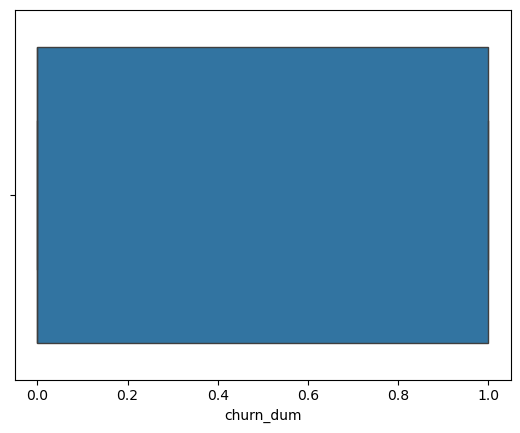

count    10000.00
mean         0.26
std          0.44
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          1.00
Name: churn_dum, dtype: float64


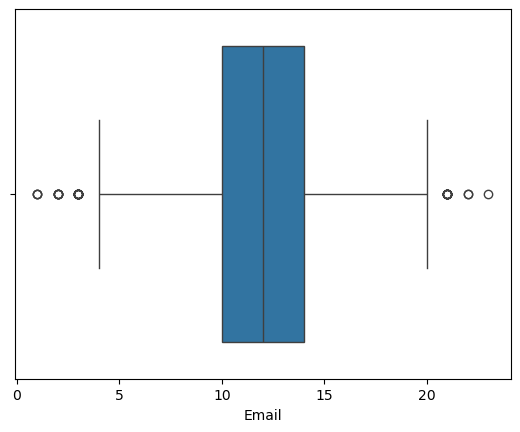

count    10000.00
mean        12.02
std          3.03
min          1.00
25%         10.00
50%         12.00
75%         14.00
max         23.00
Name: Email, dtype: float64


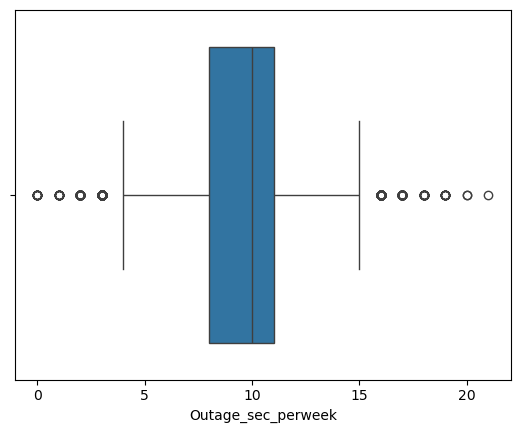

count    10000.00
mean         9.50
std          2.99
min          0.00
25%          8.00
50%         10.00
75%         11.00
max         21.00
Name: Outage_sec_perweek, dtype: float64


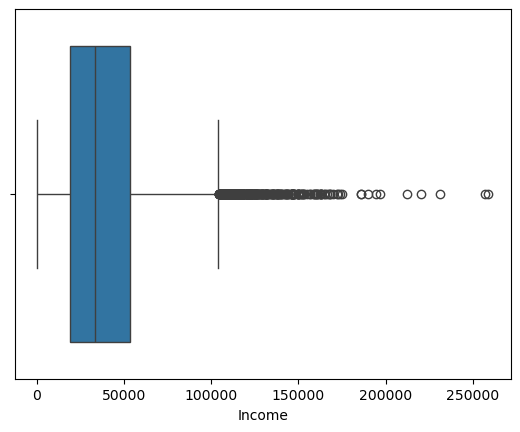

count     10000.00
mean      39806.43
std       28199.93
min         348.00
25%       19224.00
50%       33170.00
75%       53245.50
max      258900.00
Name: Income, dtype: float64


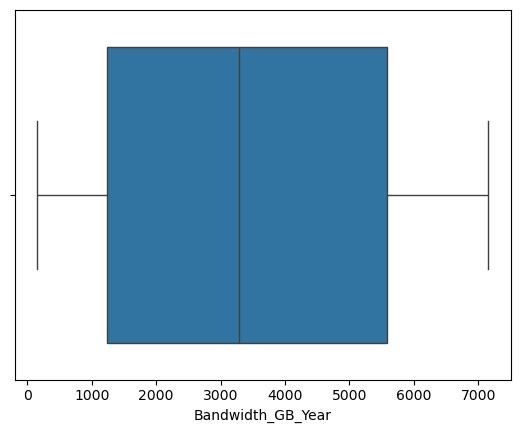

count    10000.00
mean      3391.84
std       2185.29
min        155.00
25%       1236.00
50%       3279.00
75%       5586.00
max       7158.00
Name: Bandwidth_GB_Year, dtype: float64


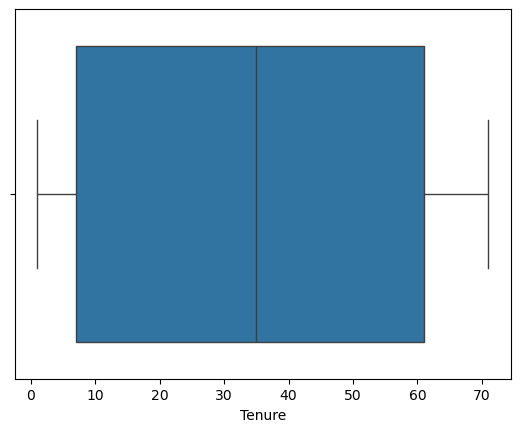

count    10000.00
mean        34.03
std         26.44
min          1.00
25%          7.00
50%         35.00
75%         61.00
max         71.00
Name: Tenure, dtype: float64


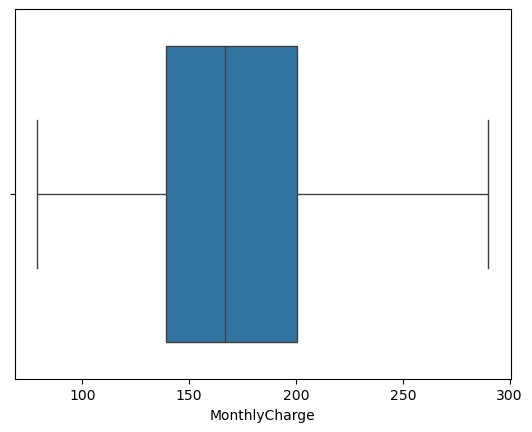

count    10000.00
mean       172.01
std         43.03
min         79.00
25%        139.00
50%        167.00
75%        200.50
max        290.00
Name: MonthlyCharge, dtype: float64


In [19]:
for column in data:
    plt.figure()    
    sns.boxplot(data = data, x = column)
    plt.show()
    print(data[column].describe().round(2).T)
    ;

In [20]:
df = data
df=(df[num]-df[num].min())/(df[num].max()-df[num].min())


In [21]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

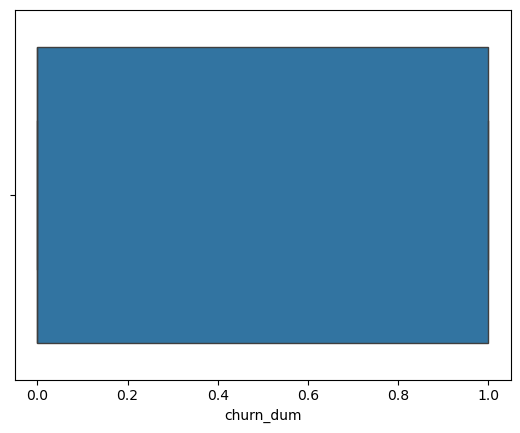

count    9817.00
mean        0.26
std         0.44
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: churn_dum, dtype: float64


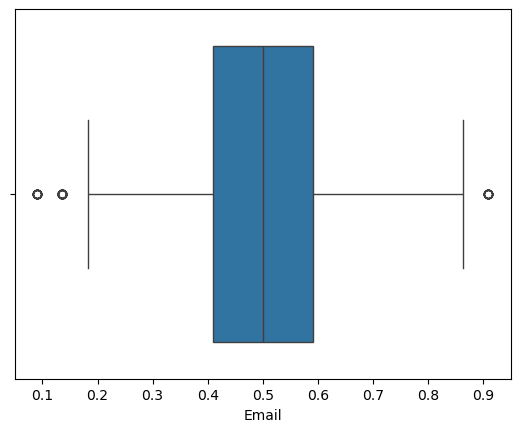

count    9817.00
mean        0.50
std         0.14
min         0.09
25%         0.41
50%         0.50
75%         0.59
max         0.91
Name: Email, dtype: float64


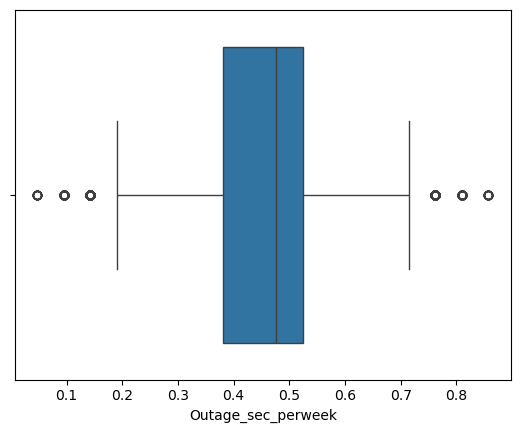

count    9817.00
mean        0.45
std         0.14
min         0.05
25%         0.38
50%         0.48
75%         0.52
max         0.86
Name: Outage_sec_perweek, dtype: float64


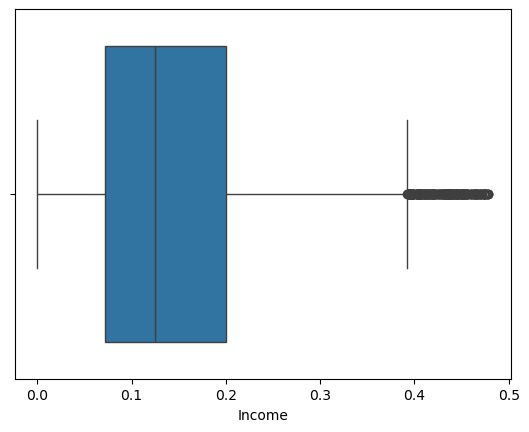

count    9817.00
mean        0.15
std         0.10
min         0.00
25%         0.07
50%         0.13
75%         0.20
max         0.48
Name: Income, dtype: float64


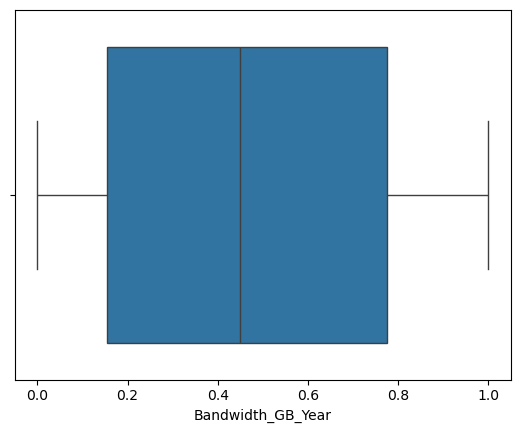

count    9817.00
mean        0.46
std         0.31
min         0.00
25%         0.15
50%         0.45
75%         0.78
max         1.00
Name: Bandwidth_GB_Year, dtype: float64


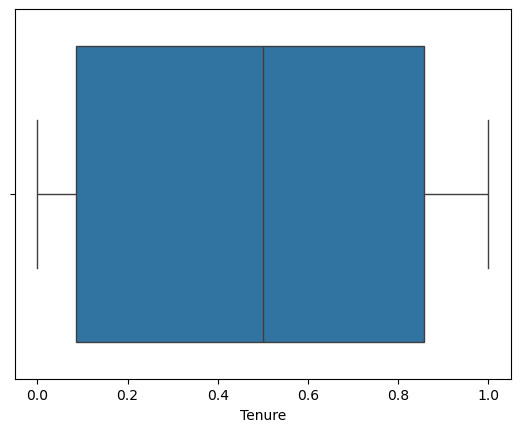

count    9817.00
mean        0.47
std         0.38
min         0.00
25%         0.09
50%         0.50
75%         0.86
max         1.00
Name: Tenure, dtype: float64


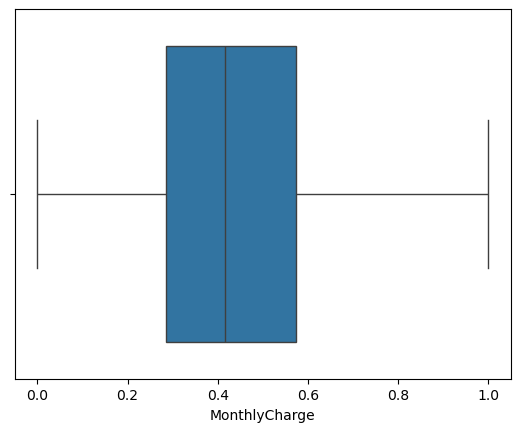

count    9817.00
mean        0.44
std         0.20
min         0.00
25%         0.28
50%         0.42
75%         0.57
max         1.00
Name: MonthlyCharge, dtype: float64


In [22]:
for column in df:
    plt.figure()    
    sns.boxplot(data = df, x = column)
    plt.show()
    print(df[column].describe().round(2).T)
    ;

Using a loop create displot over file dataframe.

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\M

<Figure size 640x480 with 0 Axes>

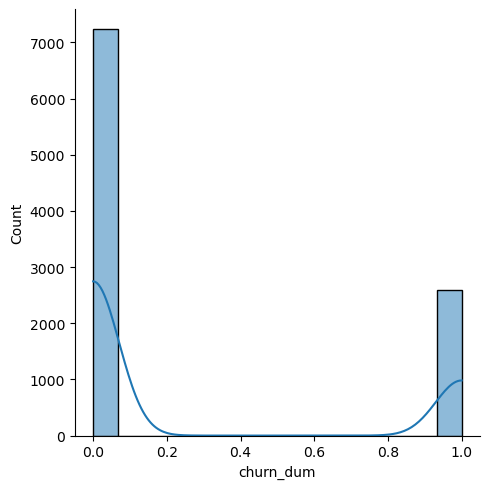

<Figure size 640x480 with 0 Axes>

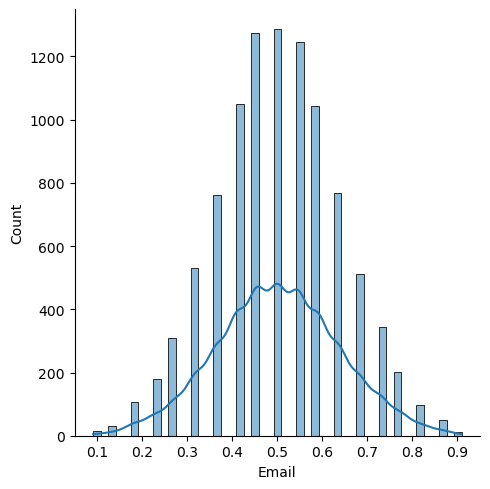

<Figure size 640x480 with 0 Axes>

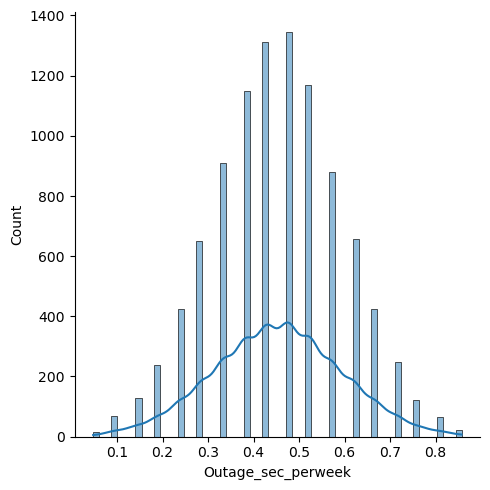

<Figure size 640x480 with 0 Axes>

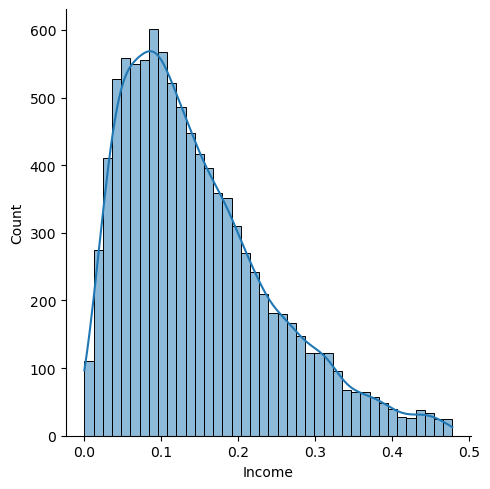

<Figure size 640x480 with 0 Axes>

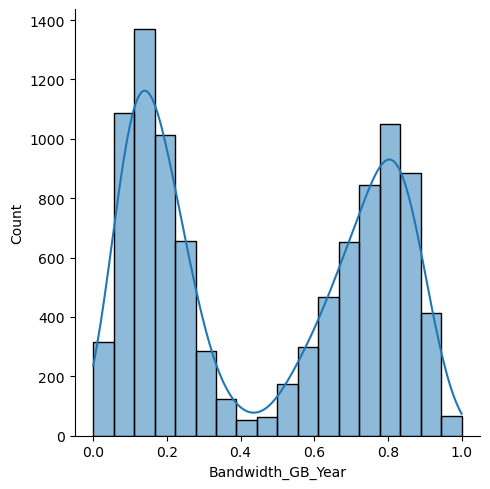

<Figure size 640x480 with 0 Axes>

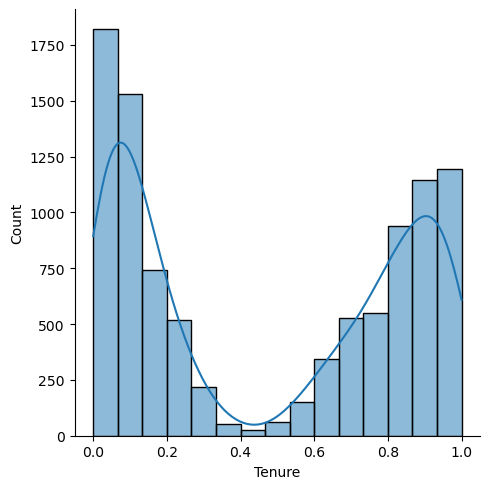

<Figure size 640x480 with 0 Axes>

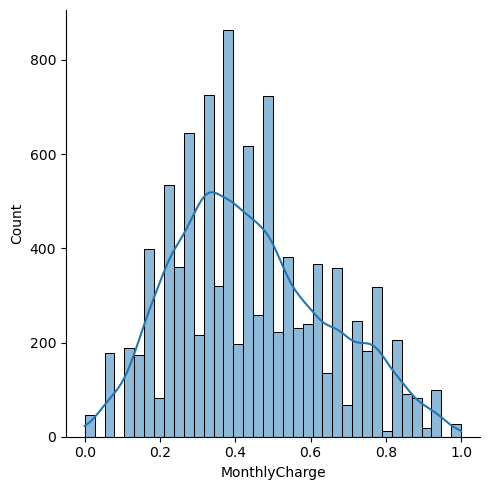

In [23]:
for column in df:
    plt.figure()    
    sns.displot(data = df, x =column, kde = True);

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


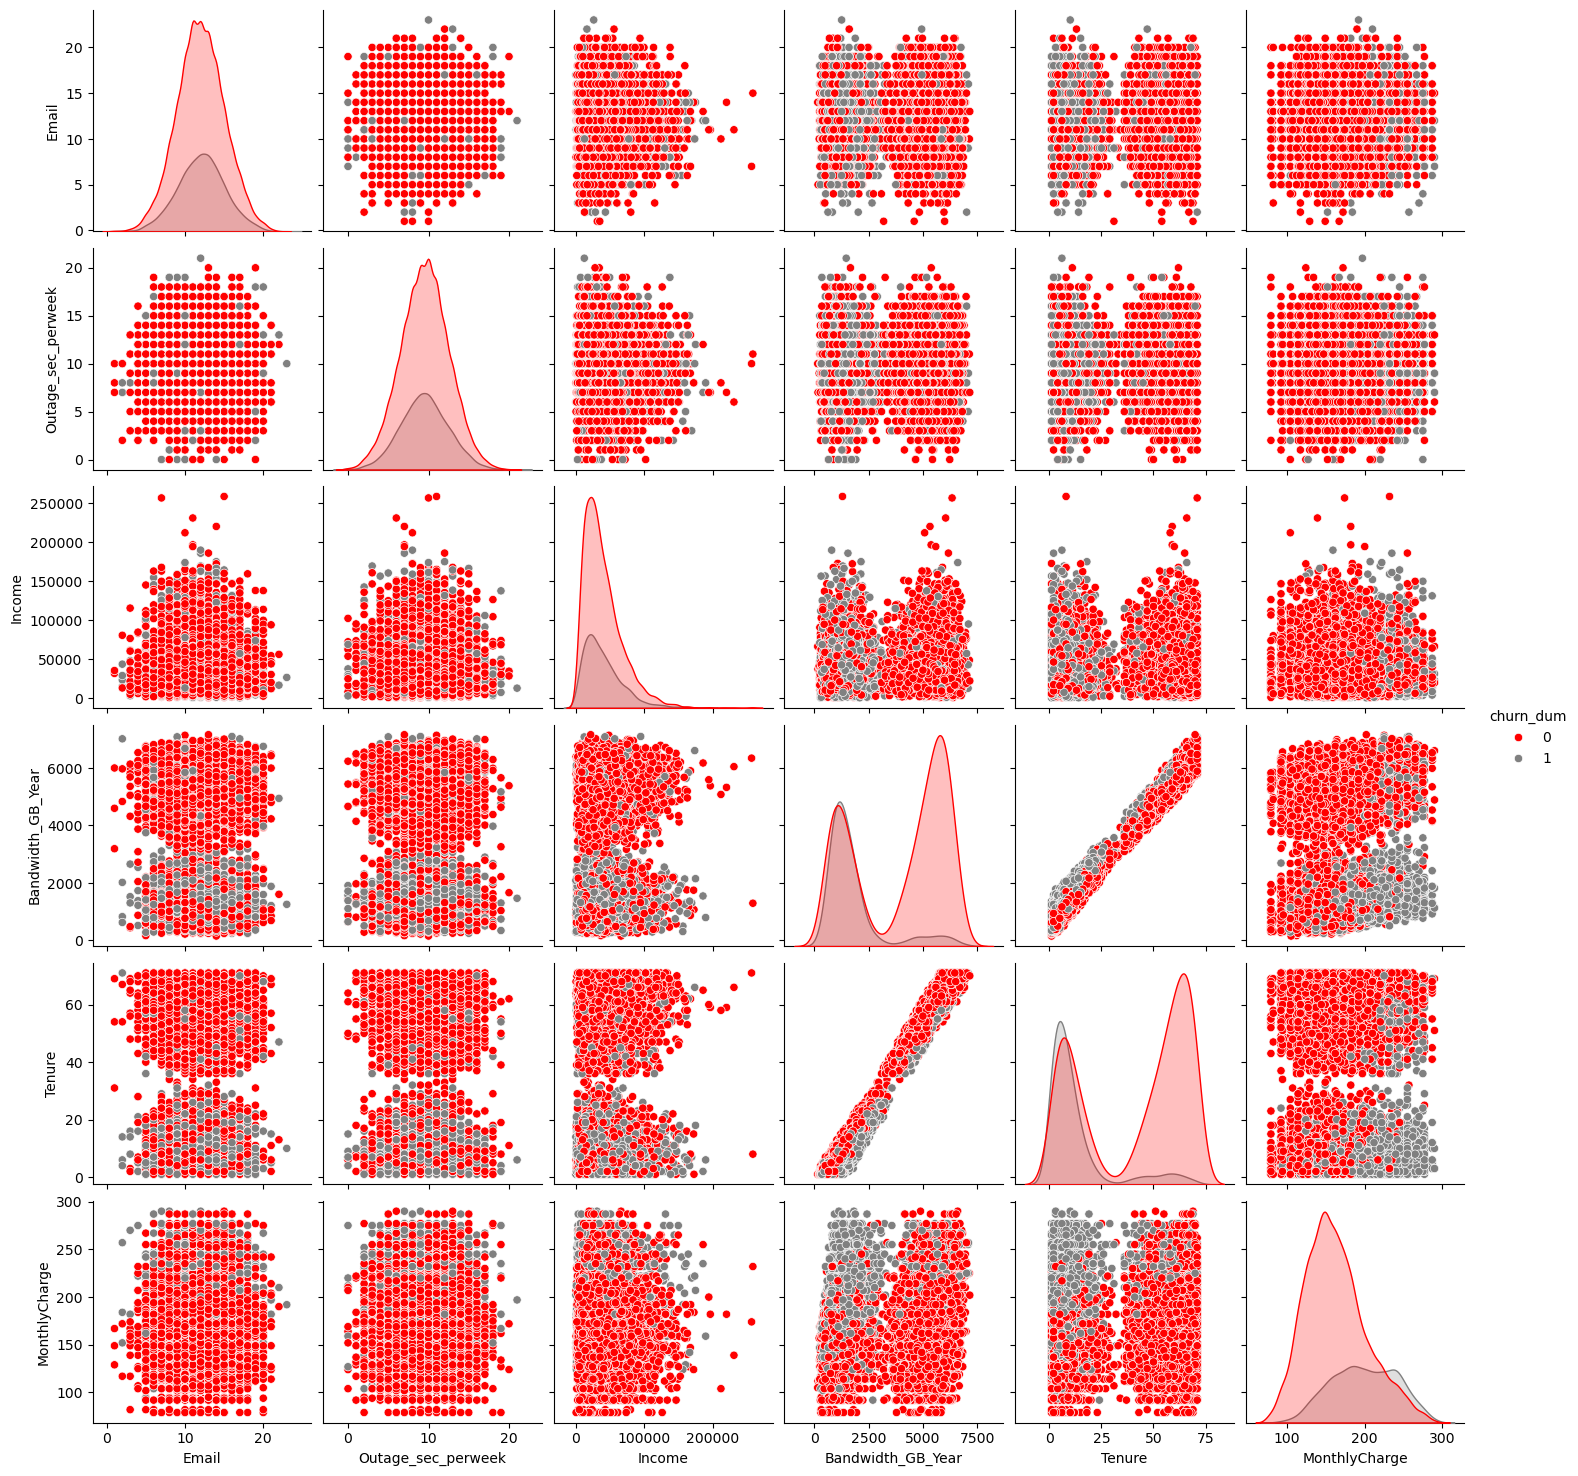

In [24]:
sns.pairplot(data = data, hue = 'churn_dum', palette = ['Red', 'Grey'])

## PREPARED DATA SET

In [28]:
file.to_csv("C:\\Users\\matth\\Desktop\\class_prep.csv")

## Part IV: Analysis

1.  Split the data into training and test data sets and provide the file(s).
2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.
3.  Provide the code used to perform the classification analysis from part D2.
 



## D Perform the data analysis and report on the results


#### Split the data into training and test data sets and provide the file(s).
 

In [29]:
#measuring model performance
# Defining X and y
X = df.drop('churn_dum',axis=1)
y = df.churn_dum

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                 random_state = 21, stratify = y)


In [33]:
X_train.to_csv("C:\\Users\\matth\\Desktop\\DATA\\X_train.csv")
X_test.to_csv("C:\\Users\\matth\\Desktop\\DATA\\X_test.csv")
y_train.to_csv("C:\\Users\\matth\\Desktop\\DATA\\y_train.csv")
y_test.to_csv("C:\\Users\\matth\\Desktop\\DATA\\y_test.csv")

I will be using K nearest neighbors. 
K nearest neighbors uses features to determine a class by the relative closeness of where an unlabeled or new element is positioned. 


I plan to review the features I have selected to see what may give me a better fit for classifying and predicting Churn vs Not Churn. 
Using scatterplots I will review each of the features to determine what is likely to classify a customer to Churn or not to Churn.
I will also review the KNN score in order to determining the fit of the model.



In [34]:
#Provide the code used to perform the classification analysis.
from mlxtend.plotting import plot_decision_regions

In [35]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)

print(\
      "Test set predictions:\\n {}\
          ".format(y_pred))
knn.score(X_test, y_test)

Test set predictions:\n [0. 0. 0. ... 0. 0. 0.]          


0.8204344874405974

## Part V: Data Summary and Implications
E.  Summarize your data analysis by doing the following:
1.  Explain the accuracy and the area under the curve (AUC) of your classification model.
2.  Discuss the results and implications of your classification analysis.
3.  Discuss one limitation of your data analysis.
4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.


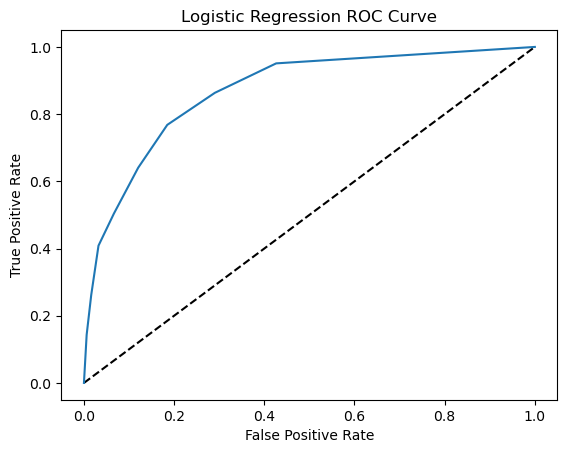

In [36]:
#Roc curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [37]:
#AUC
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X,y,
                test_size = 0.4, random_state=42)
knn.fit(X_train, y_train.values.ravel())
y_pred_prob = knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8606724103842258

In [38]:
#AUC cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y.values.ravel(), cv=5,
                            scoring='roc_auc')
print(cv_scores)

[0.75415754 0.81331482 0.95114783 0.95179525 0.73399239]


####  accuracy and the area under the curve (AUC) of your classification model.
The AUC curve ranges from 0 - 1  and is an indicator of accuracy. A straight diagnal grey line has an AUC score of 0.5 and is the equivelent of guessing. The goal is to have the curve as close to  0,1.
The AUC curve for this prediction is .86 this falls within the paramter of 8-9 to be a good score. Not excellent but good. 

#### results and implications of classification analysis.

The original intent of this analysis was to identify predictors for whether a customer would churn or not. 
Based on the output there is a good amount of accuracy indicating that  number of Emails, Outage_sec_perweek, Income, Bandwidth_GB_Year, Tenure,  and MonthlyCharge are all predictors of Churn. 
With this information we can see that the more money and time that is spent using services the higher the need is to reduce outage_sec_per_week to retain customers. 

#### limitation of  data analysis.  
Limitation of this model is that while it performs well on this smaller dataset, KNN is not efficient on larger datasets as it needs to spend resource to calculate distances for each observation. 


#### Recommend a course of action for the real-world organizational situation.
Based on the output of this sample model. Goals to reduce Outage_sec_per_week would be a good initiative to decrease churn. In addition, incentivizing longer tenures would also decrease churn. 
